In [247]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import transformers

In [248]:
df = pd.read_csv("SPAM text message 20170820 - Data.csv")

In [249]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [251]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [252]:
df['Category']

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: Category, Length: 5572, dtype: object

In [253]:
#Imbalanced data

In [254]:
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

<AxesSubplot:>

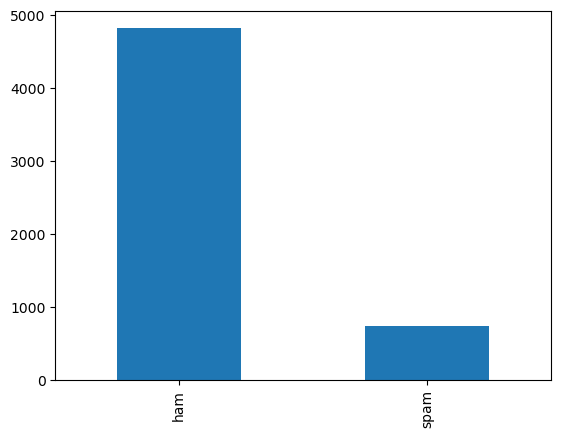

In [255]:
df['Category'].value_counts().plot(kind='bar')

In [256]:
df['Category'] = pd.get_dummies(df['Category'], drop_first=True)

In [257]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [258]:
X=df['Message']
y=df['Category']

In [259]:
X = list(X)
y = list(y)

In [260]:
from sklearn.model_selection import train_test_split

In [261]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [264]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
from tensorflow.keras.optimizers import Adam

In [265]:
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
tokenized_train_data = tokenizer(X_train, return_tensors="np", padding=True)
tokenized_test_data = tokenizer(X_test, return_tensors="np", padding=True)
labels = np.array(y_train) 


In [266]:
model = TFAutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased")

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_layer_norm', 'vocab_projector', 'vocab_transform', 'activation_13']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier', 'dropout_115', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use 

In [267]:
model.compile(optimizer=Adam(3e-5))

No loss specified in compile() - the model's internal loss computation will be used as the loss. Don't panic - this is a common way to train TensorFlow models in Transformers! To disable this behaviour please pass a loss argument, or explicitly pass `loss=None` if you do not want your model to compute a loss.


In [268]:
model.fit(dict(tokenized_train_data), labels)

140/140 [==============================] - 1354s 10s/step - loss: 0.1060


In [304]:
dict(tokenized_train_data)

{'input_ids': array([[  101,  7514,  2000, ...,     0,     0,     0],
        [  101,  7592,  1012, ...,     0,     0,     0],
        [  101,  2129,  2272, ...,     0,     0,     0],
        ...,
        [  101, 10975,  7875, ...,     0,     0,     0],
        [  101, 23961, 16644, ...,     0,     0,     0],
        [  101,  2106,  2002, ...,     0,     0,     0]]),
 'attention_mask': array([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]])}

In [269]:
y_pred = model.predict(dict(tokenized_test_data))

35/35 [==============================] - 53s 2s/step


In [270]:
y_pred

TFSequenceClassifierOutput(loss=None, logits=array([[ 2.7051878, -2.717008 ],
       [ 2.6480365, -2.6797848],
       [ 2.609292 , -2.6462746],
       ...,
       [ 2.8090265, -2.7915225],
       [ 2.180178 , -2.2186368],
       [ 1.7829436, -1.7571168]], dtype=float32), hidden_states=None, attentions=None)

In [271]:
logits = y_pred.logits
softmax = tf.nn.softmax(logits)
predictions = np.argmax(softmax.numpy(), axis=1)

In [272]:
y_test = np.array(y_test)

In [305]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [273]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [276]:
from sklearn.metrics import confusion_matrix, classification_report


In [278]:
cm = confusion_matrix(y_test, predictions)

In [279]:
cr = classification_report(y_test, predictions)

In [280]:
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", cr)

Confusion Matrix:
 [[963   3]
 [ 11 138]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       0.98      0.93      0.95       149

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [311]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

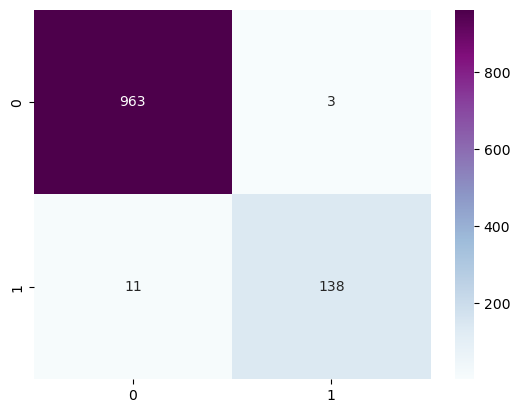

In [326]:
sns.heatmap(cm, annot=True, cmap='BuPu', fmt='g')